In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# plt.rc("figure", autolayout=True)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 8.0)

import pandas as pd
import geopandas as gpd
plot_dataframe = gpd.plotting.plot_dataframe
import numpy as np
import itertools

EPSG=2263 # projection

RAWDATA_DIR = "NYC_data/raw_data"

nycdistrs=gpd.read_file("NYC_data/nysd_16c/nysd.shp").to_crs(epsg=EPSG)

In [14]:
geom.centroid.x

1034568.5830883405

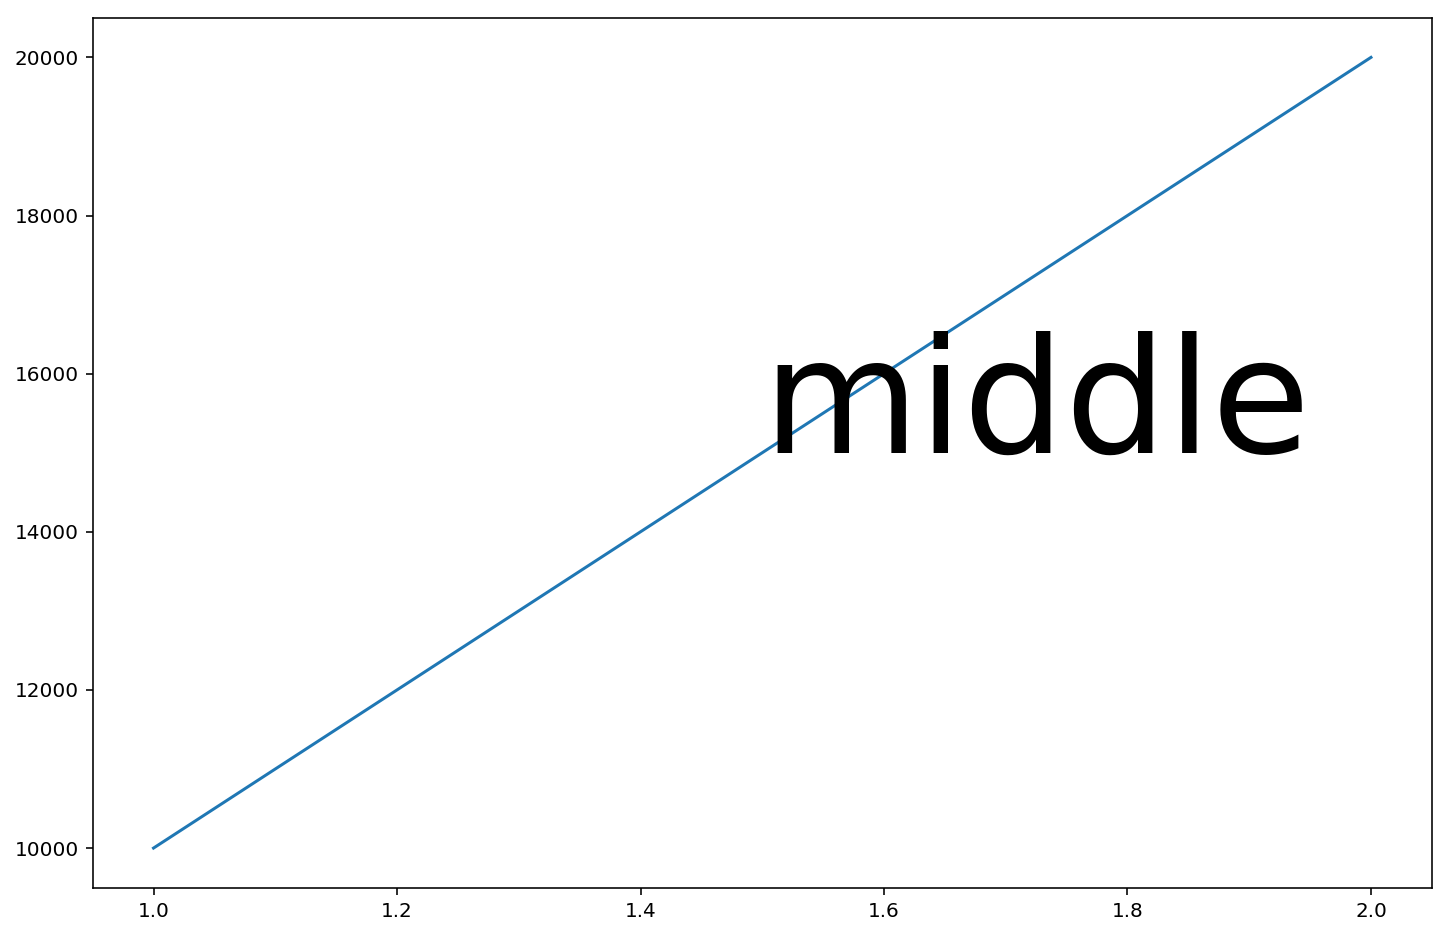

In [42]:
plt.plot([1,2], [10000, 20000])
ax = plt.gca()
ymin,ymax = plt.ylim()
# Get dimensions of y-axis in pixels
y1, y2 = ax.get_window_extent().get_points()[:, 1]
# Get unit scale
yscale = (y2-y1)/(ymax-ymin)
plt.text(1.5, 15000.0, "middle", fontsize=2000*yscale)

In [36]:
ax.get_window_extent().get_points()[:, 1]

array([ 68.5 , 510.38])

In [37]:
ext=ax.get_window_extent()

In [38]:
ext.

(104.5, 68.5, 676.6, 441.88)

In [ ]:
def schdistr_labels(ax, color="black", alpha=0.5, scaleup=1.0, **kwargs):
    ymin,ymax = plt.ylim()
    # Get dimensions of y-axis in pixels
    y1, y2 = ax.get_window_extent().get_points()[:, 1]
    # Get unit scale
    yscale = (y2-y1)/(ymax-ymin)
    for irow in range(nycdistrs.shape[0]):
        row = nycdistrs.loc[irow, :]
        geom = row.geometry
        schdistr = row.SchoolDist
        square_side = np.sqrt(geom.area)
        center = geom.representative_point()
        plt.text(center.x, center.y, 
                 schdistr,
                 horizontalalignment="center",
                 verticalalignment="center",
                 fontweight="black",
                 color=color,
                 alpha=alpha,
                 fontsize=max(square_side * yscale / 3 * scaleup, 10),
                 **kwargs
                 )


(905464.7388458241, 1075092.8784027107, 112485.76064956379, 280480.4142586858)

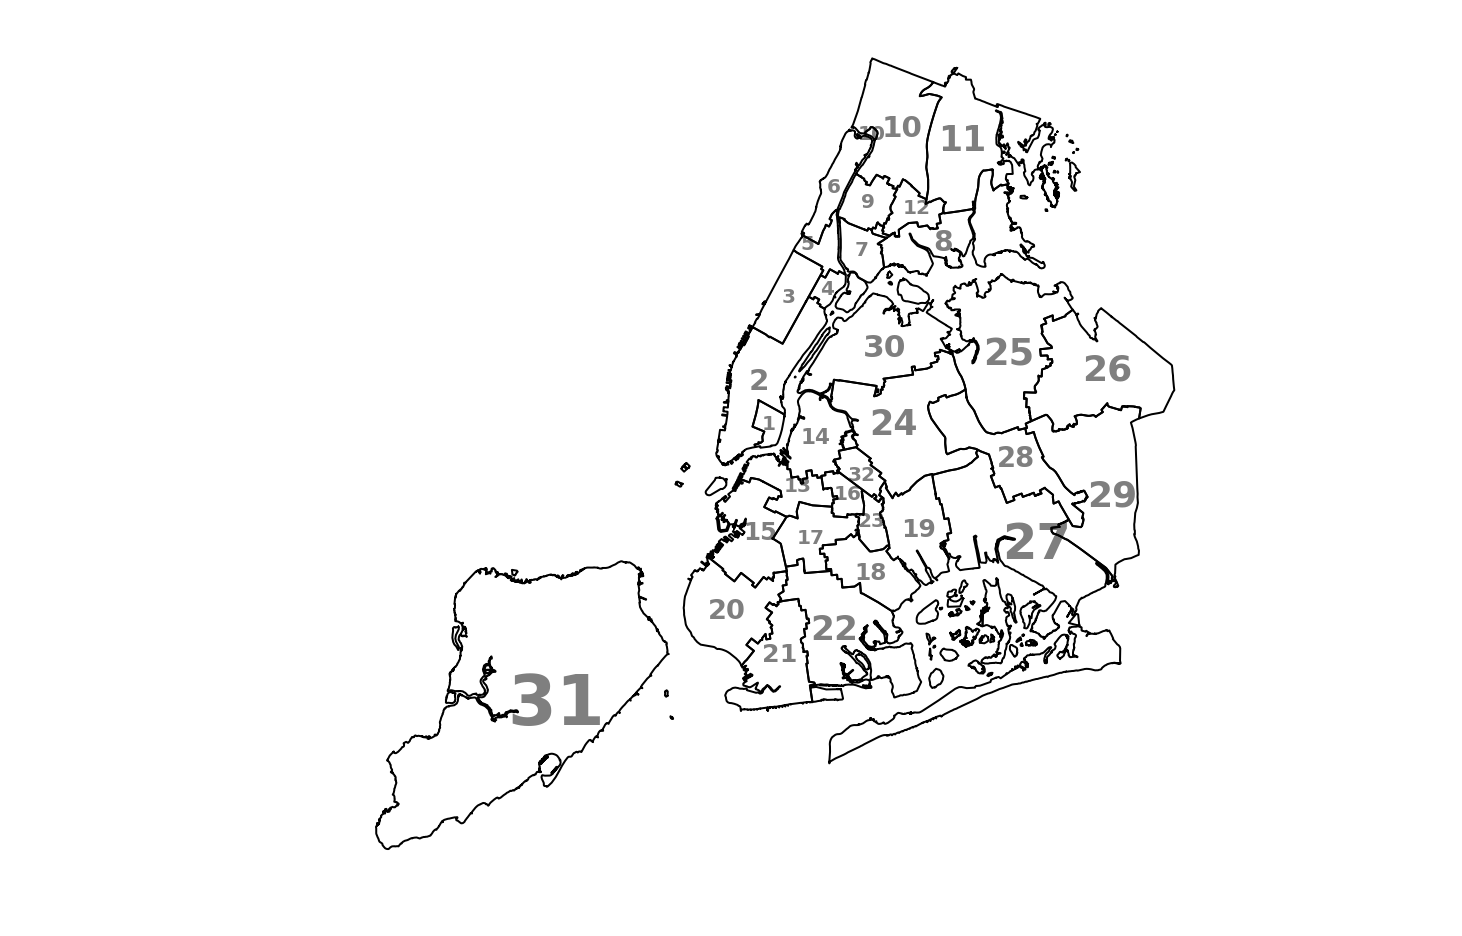

In [28]:
plot_dataframe(nycdistrs, color="None", figsize=(24.0, 16.0), ax=plt.gca())

ymin,ymax = plt.ylim()
# Get dimensions of y-axis in pixels
y1, y2 = plt.gca().get_window_extent().get_points()[:, 1]
# Get unit scale
yscale = (y2-y1)/(ymax-ymin)

for irow in range(nycdistrs.shape[0]):
    row = nycdistrs.loc[irow, :]
    geom = row.geometry
    schdistr = row.SchoolDist
    square_side = np.sqrt(geom.area)
    center = geom.representative_point()
    plt.text(center.x, center.y, 
             schdistr,
             horizontalalignment="center",
             verticalalignment="center",
             fontweight="black",
             color="black",
             alpha=0.5,
             fontsize=max(square_side * yscale / 3, 10)
             )

plt.axes().set_aspect('equal', 'datalim')
plt.axis("off")